# Exemple : utilisation de tSNE pour projeter les images de chiffres en 2 dimensions

Inspiré de https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_tsne.html

Sur tSNE, voir aussi les démos de Google:
* https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
* https://artsexperiments.withgoogle.com/tsnemap
* A.I. Experiments: Visualizing High-Dimensional Space https://www.youtube.com/watch?v=wvsE8jm1GzE

Et voir aussi https://distill.pub/2016/misread-tsne/

Nota: l'algorithme UMAP, plus récent, est souvent très compétitif, voir https://www.biorxiv.org/content/early/2018/04/10/298430 ou http://doc.gold.ac.uk/~lfedd001/three/demo.html

In [2]:
# Initialisations
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8) # (w, h)

from sklearn.manifold import TSNE


In [3]:
# Les données
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data[:500] # limite à 500 pour clarifier le dessin
Y = digits.target[:500]
print('Données chargées, dimensions ', X.shape)
# affiche les classes et le nombre d'exemples dans chacune
print('Classes: ', np.unique(Y, return_counts=True)) 

Données chargées, dimensions  (500, 64)
Classes:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([51, 52, 50, 53, 49, 50, 51, 50, 46, 48]))


In [4]:
# Fit le modèle tSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

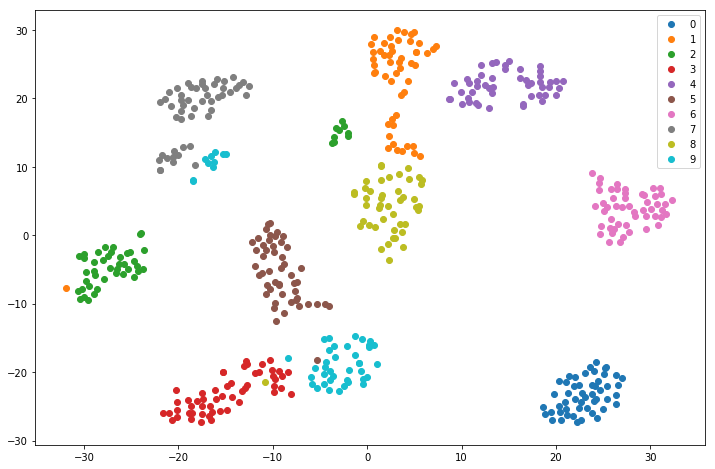

In [6]:
# Affichage
target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
colors = colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] # palette de 10 couleurs

for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[Y == i, 0], X_2d[Y == i, 1], c=c, label=label)
plt.legend()
plt.savefig('tSNE-digits.pdf')
plt.show()